<a href="https://colab.research.google.com/github/Ibad17/assignment/blob/main/Dl5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
import argparse
from google.colab.patches import cv2_imshow  # Only for Colab

# Load the pretrained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO category names
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle',
    'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'lamb', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def detect_objects(image_path, output_path=None, confidence_threshold=0.5, device='cpu'):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from '{image_path}'. Please check the file path and ensure the image exists.")
        return None

    # Resize image if too large
    max_size = 40
    h, w = image.shape[:2]
    if max(h, w) > max_size:
        scale = max_size / max(h, w)
        image = cv2.resize(image, (int(w * scale), int(h * scale)))

    # Prepare image tensor
    image_tensor = F.to_tensor(image).unsqueeze(0).to(device)

    # Perform inference
    model.to(device)
    with torch.no_grad():
        predictions = model(image_tensor)

    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    # Draw bounding boxes for high-confidence detections
    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))
            cv2.rectangle(image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save or display the image
    if output_path:
        cv2.imwrite(output_path, image)
        print(f"Output saved to {output_path}")
    else:
        # Use cv2.imshow in local environments or cv2_imshow in Colab
        try:
            cv2_imshow(image)  # For Colab
        except ImportError:
            cv2.imshow("Detected Objects", image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

    return image

if __name__ == "__main__":
    # Handle argparse in a Jupyter/Colab safe way
    try:
        parser = argparse.ArgumentParser(description="Object Detection with Faster R-CNN")
        parser.add_argument("image_path", type=str, help="Path to the input image.")
        parser.add_argument("--output_path", type=str, default=None, help="Path to save the output image.")
        parser.add_argument("--confidence", type=float, default=0.5, help="Confidence threshold for object detection.")
        parser.add_argument("--use_gpu", action="store_true", help="Use GPU for inference if available.")
        args = parser.parse_args()

        device = "cuda" if args.use_gpu and torch.cuda.is_available() else "cpu"
        detect_objects(args.image_path, args.output_path, args.confidence, device)
    except SystemExit:
        # Use fallback testing for Jupyter/Colab
        print("Argparse not supported. Running fallback.")
        IMAGE_PATH = "/dog.jpeg"  # Replace with your test image path
        OUTPUT_PATH = None  # Set to "output.jpg" if you want to save
        CONFIDENCE_THRESHOLD = 0.5
        USE_GPU = True

        device = "cuda" if USE_GPU and torch.cuda.is_available() else "cpu"
        detect_objects(IMAGE_PATH, OUTPUT_PATH, CONFIDENCE_THRESHOLD, device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 126MB/s]


Argparse not supported. Running fallback.
Error: Could not load image from '/dog.jpeg'. Please check the file path and ensure the image exists.


usage: colab_kernel_launcher.py [-h] [--output_path OUTPUT_PATH] [--confidence CONFIDENCE]
                                [--use_gpu]
                                image_path
colab_kernel_launcher.py: error: unrecognized arguments: -f


usage: colab_kernel_launcher.py [-h] [--output_path OUTPUT_PATH] [--confidence CONFIDENCE]
                                [--use_gpu]
                                image_path
colab_kernel_launcher.py: error: unrecognized arguments: -f


Argparse not supported in this environment. Running fallback.


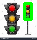

In [5]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
import argparse
from google.colab.patches import cv2_imshow  # For Colab

# Load the pretrained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO category names
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle',
    'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def detect_objects(image_path, output_path=None, confidence_threshold=0.5, device='cpu'):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from '{image_path}'. Please check the file path and ensure the image exists.")
        return None

    # Resize the image if too large
    max_size = 40 # Keep this realistic
    h, w = image.shape[:2]
    if max(h, w) > max_size:
        scale = max_size / max(h, w)
        image = cv2.resize(image, (int(w * scale), int(h * scale)))

    # Prepare the image tensor
    image_tensor = F.to_tensor(image).unsqueeze(0).to(device)

    # Perform inference
    model.to(device)
    with torch.no_grad():
        predictions = model(image_tensor)

    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    # Draw bounding boxes for high-confidence detections
    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))
            cv2.rectangle(image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(image, f"{label}: {score:.2f}", (start_point[0], start_point[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save or display the image
    if output_path:
        cv2.imwrite(output_path, image)
        print(f"Output saved to {output_path}")
    else:
        # Use cv2.imshow for local environments or cv2_imshow for Colab
        try:
            cv2_imshow(image)  # For Colab
        except ImportError:
            cv2.imshow("Detected Objects", image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

    return image

if __name__ == "__main__":
    try:
        parser = argparse.ArgumentParser(description="Object Detection with Faster R-CNN")
        parser.add_argument("image_path", type=str, help="Path to the input image.")
        parser.add_argument("--output_path", type=str, default=None, help="Path to save the output image.")
        parser.add_argument("--confidence", type=float, default=0.5, help="Confidence threshold for object detection.")
        parser.add_argument("--use_gpu", action="store_true", help="Use GPU for inference if available.")
        args = parser.parse_args()

        device = "cuda" if args.use_gpu and torch.cuda.is_available() else "cpu"
        detect_objects(args.image_path, args.output_path, args.confidence, device)
    except SystemExit:
        # Handle Jupyter/Colab fallback
        print("Argparse not supported in this environment. Running fallback.")
        IMAGE_PATH = "traffic.jpeg"  # Replace with your test image path
        OUTPUT_PATH = None  # Set to "output.jpg" if you want to save the result
        CONFIDENCE_THRESHOLD = 0.5
        USE_GPU = True

        device = "cuda" if USE_GPU and torch.cuda.is_available() else "cpu"
        detect_objects(IMAGE_PATH, OUTPUT_PATH, CONFIDENCE_THRESHOLD, device)
